# The Sequential Model API

> In this post, we will dig into the basic usage of building neural network with Tensorflow Sequential APIs.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Deep_Learning, Tensorflow-Keras]
- image: 

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
print("NumPy: {}".format(np.__version__))
print("Pandas: {}".format(pd.__version__))
print("Tensorflow: {}".format(tf.__version__))

NumPy: 1.18.1
Pandas: 1.0.1
Tensorflow: 2.3.1


## Building a sequential model


### Coding Tutorial - Build a feedforward neural network model

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

In [4]:
# Build the Sequential feedforward neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Softmax()
])

In [5]:
# Print the model init weights
model.weights

[<tf.Variable 'dense/kernel:0' shape=(784, 16) dtype=float32, numpy=
 array([[ 0.05694753, -0.01445955,  0.02889278, ...,  0.07327136,
         -0.07537139,  0.08616881],
        [-0.07410051, -0.03694982, -0.04157752, ...,  0.03010982,
         -0.02780097, -0.00887114],
        [ 0.07740739,  0.04293187,  0.01681171, ...,  0.08571155,
          0.01035317, -0.05937039],
        ...,
        [ 0.05397604,  0.07120949,  0.08604382, ..., -0.05617909,
         -0.03425014, -0.08230225],
        [ 0.02035844, -0.06967027,  0.01005485, ...,  0.02447511,
          0.07991299, -0.00553514],
        [ 0.00868416,  0.05871408, -0.07087392, ...,  0.02097424,
         -0.03808666,  0.03541996]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(16,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(16, 16) dtype=float32, numpy=
 array([[-0.29837987, -0.34982526,  0.07724884, -0.4041955

In [6]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
softmax (Softmax)            (None, 16)                0         
Total params: 13,104
Trainable params: 13,104
Non-trainable params: 0
_________________________________________________________________


## Convolutional and pooling layers
### Coding Tutorial - Build Convolutional Neural network model


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [8]:
# Build the Sequential convolutional neural network model
model = Sequential([
    Conv2D(16, (3, 3), padding='SAME', strides=2, activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((3, 3)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 17,258
Trainable params: 17,258
Non-trainable params: 0
_________________________________________________________________


Currently, the default tensorflow data type is 'channels_last', but we can change it with `data_format` argument.

In [10]:
model = Sequential([
    Conv2D(16, (3, 3), padding='SAME', strides=2, activation='relu', input_shape=(1, 28, 28), data_format='channels_first'),
    MaxPooling2D((3, 3), data_format='channels_first'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 14, 14)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 4, 4)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 17,258
Trainable params: 17,258
Non-trainable params: 0
_________________________________________________________________


## Weight and bias initialisers 

In this reading, we investigate different ways to initialise weights and biases in the layers of neural networks.

### Default weights and biases

In the models we have worked with so far, we have not specified the initial values of the weights and biases in each layer of our neural networks.

The default values of the weights and biases in TensorFlow depend on the type of layers we are using. 

For example, in a `Dense` layer, the biases are set to zero (`zeros`) by default, while the weights are set according to `glorot_uniform`, the Glorot uniform initialiser. 

The Glorot uniform initialiser draws the weights uniformly at random from the closed interval $[-c,c]$, where $$c = \sqrt{\frac{6}{n_{input}+n_{output}}}$$

and $n_{input}$ and $n_{output}$ are the number of inputs to, and outputs from the layer respectively.

### Initialising your own weights and biases
We often would like to initialise our own weights and biases, and TensorFlow makes this process quite straightforward.

When we construct a model in TensorFlow, each layer has optional arguments `kernel_initialiser` and `bias_initialiser`, which are used to set the weights and biases respectively.

If a layer has no weights or biases (e.g. it is a max pooling layer), then trying to set either `kernel_initialiser` or `bias_initialiser` will throw an error.

Let's see an example, which uses some of the different initialisations available in Keras.

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPooling1D

# Construct a model
model = Sequential([
    Conv1D(filters=16, kernel_size=3, input_shape=(128, 64), kernel_initializer='random_uniform',
           bias_initializer='zeros', activation='relu'),
    MaxPooling1D(pool_size=4),
    Flatten(),
    Dense(64, kernel_initializer='he_uniform', bias_initializer='ones', activation='relu')
])

As the following example illustrates, we can also instantiate initialisers in a slightly different manner, allowing us to set optional arguments of the initialisation method.

## The compile method

In [12]:
# Define the model optimizer, loss function and metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.metrics)

sparse_categorical_crossentropy
[]


Or we can implement it like this,

In [14]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=[acc, mae])

print(model.loss)
print(model.optimizer)
print(model.optimizer.lr)
print(model.metrics)

categorical_crossentropy
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>
[]


### Metrics in tf.Keras
In this reading we will be exploring the different metrics in Keras that may be used to judge the performance of a model.

In [15]:
import tensorflow.keras.backend as K

One of the most common metrics used for classification problems in Keras is `'accuracy'`. 

We will begin with a simple example of a model that uses accuracy as a metric.

In [16]:
# Build the model
model = Sequential([
  Flatten(input_shape=(28,28)),
  Dense(32, activation='relu'),
  Dense(32, activation='tanh'),
  Dense(10, activation='softmax'),
])

In [17]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

We now have a model that uses accuracy as a metric to judge its performance.

But how is this metric actually calculated? We will break our discussion into two cases.


#### Case 1 - Binary Classification with sigmoid activation function
Suppose we are training a model for a binary classification problem with a sigmoid activation function (softmax activation functions are covered in the next case). 

Given a training example with input $x^{(i)}$, the model will output a float between 0 and 1. Based on whether this float is less than or greater than our "threshold" (which by default is set at 0.5), we round the float to get the predicted classification $y_{pred}$ from the model.

The accuracy metric compares the value of $y_{pred}$ on each training example with the true output, the one-hot coded vector $y_{true}^{(i)}$ from our training data.

Let $$\delta(y_{pred}^{(i)},y_{true}^{(i)}) = \begin{cases} 1 & y_{pred}=y_{true}\\
0 & y_{pred}\neq y_{true} \end{cases}$$

The accuracy metric  computes the mean of $\delta(y_{pred}^{(i)},y_{true}^{(i)})$ over all training examples.

$$ accuracy = \frac{1}{N} \sum_{i=1}^N \delta(y_{pred}^{(i)},y_{true}^{(i)}) $$

This is implemented in the backend of Keras as follows. 
Note: We have set $y_{true}$ and $y_{pred}$ ourselves for the purposes of this example.

In [18]:
# Sigmoid activation function
y_true = tf.constant([0.0,1.0,1.0])
y_pred = tf.constant([0.4,0.8, 0.3])
accuracy = K.mean(K.equal(y_true, K.round(y_pred)))
accuracy

<tf.Tensor: shape=(), dtype=float32, numpy=0.6666667>

#### Case 2 - Categorical Classification

Now suppose we are training a model for a classification problem which should sort data into $m>2$ different classes using a softmax activation function in the last layer.

Given a training example with input $x^{(i)}$, the model will output a tensor of probabilities $p_1, p_2, \dots p_m$, giving the likelihood (according to the model) that $x^{(i)}$ falls into each class.

The accuracy metric works by determining the largest argument in the $y_{pred}^{(i)}$ tensor, and compares its index to the index of the maximum value of $y_{true}^{(i)}$ to determine $\delta(y_{pred}^{(i)},y_{true}^{(i)})$. It then computes the accuracy in the same way as for the binary classification case.

$$ accuracy = \frac{1}{N} \sum_{i=1}^N \delta(y_{pred}^{(i)},y_{true}^{(i)}) $$

In the backend of Keras, the accuracy metric is implemented slightly differently depending on whether we have a binary classification problem ($m=2$) or a categorical classifcation problem. Note that the accuracy for binary classification problems is the same, no matter if we use a sigmoid or softmax activation function to obtain the output.


In [19]:
# Binary classification with softmax
y_true = tf.constant([[0.0,1.0],[1.0,0.0],[1.0,0.0],[0.0,1.0]])
y_pred = tf.constant([[0.4,0.6], [0.3,0.7], [0.05,0.95],[0.33,0.67]])
accuracy =K.mean(K.equal(y_true, K.round(y_pred)))
accuracy

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [20]:
# Categorical classification with m>2
y_true = tf.constant([[0.0,1.0,0.0,0.0],[1.0,0.0,0.0,0.0],[0.0,0.0,1.0,0.0]])
y_pred = tf.constant([[0.4,0.6,0.0,0.0], [0.3,0.2,0.1,0.4], [0.05,0.35,0.5,0.1]])
accuracy = K.mean(K.equal(K.argmax(y_true, axis=-1), K.argmax(y_pred, axis=-1)))
accuracy

<tf.Tensor: shape=(), dtype=float32, numpy=0.6666667>

### Other examples of metrics
We will now look at some other metrics in Keras. A full list is available at <https://keras.io/metrics/>.

#### Binary accuracy and categorical accuracy
The `binary_accuracy` and `categorical_accuracy` metrics are, by default, identical to the Case 1 and 2 respectively of the `accuracy` metric explained above. 

However, using `binary_accuracy` allows you to use the optional `threshold` argument, which sets the minimum value of $y_{pred}$ which will be rounded to 1. As mentioned above, it is set as `threshold=0.5` by default.

Below we give some examples of how to compile a model with `binary_accuracy` with and without a threshold.

In [21]:
# Compile the model with default threshold (=0.5)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['binary_accuracy'])

In [22]:
# The threshold can be specified as follows
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.5)])

#### Sparse categorical accuracy

This is a very similar metric to categorical accuracy with one major difference - the label $y_{true}$ of each training example is not expected to be a one-hot encoded vector, but to be a tensor consisting of a single integer. This integer is then compared to the index of the maximum argument of $y_{pred}$ to determine $\delta(y_{pred}^{(i)},y_{true}^{(i)})$.

In [23]:
# Two examples of compiling a model with a sparse categorical accuracy metric
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=["sparse_categorical_accuracy"])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

#### (Sparse) Top $k$-categorical accuracy 
In top $k$-categorical accuracy, instead of computing how often the model correctly predicts the label of a training example, the metric computes how often the model has $y_{true}$ in the top $k$ of its predictions. By default, $k=5$.

As before, the main difference between top $k$-categorical accuracy and its sparse version is that the former assumes $y_{true}$ is a one-hot encoded vector, whereas the sparse version assumes $y_{true}$ is an integer.

In [24]:
# Compile a model with a top-k categorical accuracy metric with default k (=5)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=["top_k_categorical_accuracy"])

In [25]:
# Specify k instead with the sparse top-k categorical accuracy
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[tf.keras.metrics.SparseTopKCategoricalAccuracy(k=3)])

### Custom metrics
It is also possible to define your own custom metric in Keras.
You will need to make sure that your metric takes in (at least) two arguments called `y_true` and `y_pred` and then output a single tensor value.

In [26]:
# Define a custom metric
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

We can then use this metric when we compile our model as follows.

In [27]:
# Specify k instead with the sparse top-k categorical accuracy
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[mean_pred])

### Multiple metrics
Finally, it is possible to use multiple metrics to judge the performance of your model. 

Here's an example:

In [28]:
# Compile the model with multiple metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[mean_pred, "accuracy",tf.keras.metrics.SparseTopKCategoricalAccuracy(k=3)])

### Sources and Further Reading
* The metrics page on the Keras website: https://keras.io/metrics/
* The source code for the metrics: https://github.com/keras-team/keras/blob/master/keras/metrics.py

## The fit method


In [29]:
from tensorflow.keras.preprocessing import image

### Load the data

In [30]:
# Load the Fashion-MNIST dataset
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [32]:
# Print the shape of the training data
print(train_images.shape)

(60000, 28, 28)


In [34]:
# Define the labels
labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(train_labels[0])
print(labels[train_labels[0]])

9
Ankle boot


In [35]:
# Rescale the image values so that they lie in between 0 and 1.
train_images = train_images / 255.
test_images = test_images/ 255.

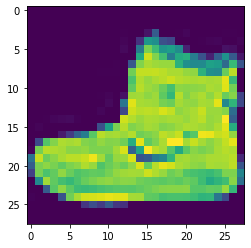

In [38]:
# Display one of the images
sample = train_images[0, :, :]
plt.imshow(sample)
plt.show()

### Fit the model

In [40]:
from tensorflow.keras.layers import MaxPooling2D

model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((3, 3)),
    Flatten(),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


In [41]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
              metrics=[acc, mae])

In [42]:
# Fit the model
history = model.fit(train_images[..., tf.newaxis], train_labels, epochs=8, batch_size=256, verbose=2)

Epoch 1/8
235/235 - 1s - loss: 0.5683 - sparse_categorical_accuracy: 0.8006 - mean_absolute_error: 4.4200
Epoch 2/8
235/235 - 1s - loss: 0.3939 - sparse_categorical_accuracy: 0.8602 - mean_absolute_error: 4.4200
Epoch 3/8
235/235 - 1s - loss: 0.3585 - sparse_categorical_accuracy: 0.8732 - mean_absolute_error: 4.4200
Epoch 4/8
235/235 - 1s - loss: 0.3405 - sparse_categorical_accuracy: 0.8788 - mean_absolute_error: 4.4200
Epoch 5/8
235/235 - 1s - loss: 0.3290 - sparse_categorical_accuracy: 0.8827 - mean_absolute_error: 4.4200
Epoch 6/8
235/235 - 1s - loss: 0.3152 - sparse_categorical_accuracy: 0.8873 - mean_absolute_error: 4.4200
Epoch 7/8
235/235 - 1s - loss: 0.3046 - sparse_categorical_accuracy: 0.8922 - mean_absolute_error: 4.4200
Epoch 8/8
235/235 - 1s - loss: 0.2976 - sparse_categorical_accuracy: 0.8936 - mean_absolute_error: 4.4200


### Plot training history

In [43]:
# Load the history into a pandas DataFrame
df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.568350,0.800600,4.420000
1,0.393926,0.860250,4.420000
2,0.358524,0.873200,4.420001
3,0.340509,0.878767,4.419999
4,0.329038,0.882717,4.420001


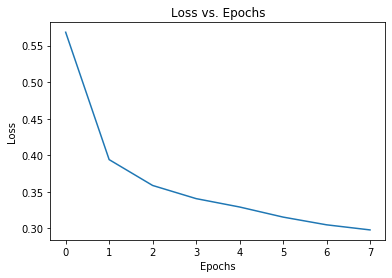

In [44]:
# Make a plot for the loss
loss_plot = df.plot(y='loss', title='Loss vs. Epochs', legend=False)
loss_plot.set(xlabel='Epochs', ylabel='Loss')
plt.show()

## The evaluate and predict methods


### Evaluate the model on the test set


In [46]:
# Evaluate the model
test_loss, test_accuracy, test_mae = model.evaluate(test_images[..., tf.newaxis], test_labels)

313/313 [==============================] - 0s 2ms/step - loss: 0.3224 - sparse_categorical_accuracy: 0.8875 - mean_absolute_error: 4.4200


In [47]:
print(test_loss, test_accuracy, test_mae)

0.32237496972084045 0.887499988079071 4.419997215270996


### Make predictions from the model

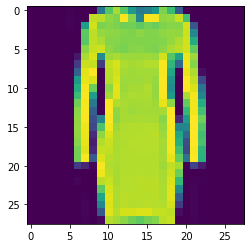

Label: Dress


In [50]:
# Choose a random test image
random_idx = np.random.choice(test_images.shape[0])
sample = test_images[random_idx]
plt.imshow(sample)
plt.show()
print(f"Label: {labels[test_labels[random_idx]]}")

In [54]:
# Get the model predictions
predictions = model.predict(sample[tf.newaxis, ..., tf.newaxis])
print(f"Model prediction: {labels[np.argmax(predictions)]}")

Model prediction: Dress
